Find the local minima of the function: $f\left(x\right)=\left(x+5\right)^{2}$ starting from the point x=3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

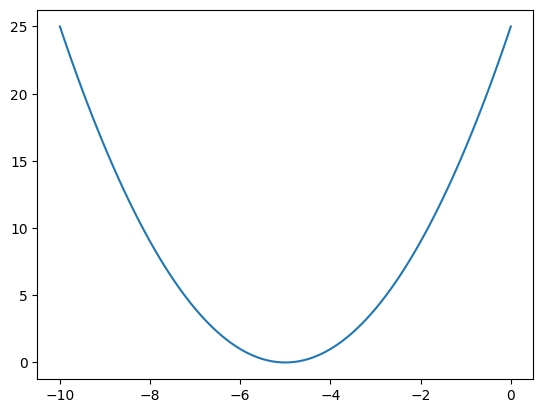

In [5]:
x=np.arange(-10,0.001,0.1)
y=(x+5)**2
plt.plot(x,y)

Calculate derivative: $$\frac{dy}{dx}=\frac{d}{dx}\left ( x + 5 \right )^{2} = 2 * \left ( x + 5 \right )$$

Update at every iterator:

$$x_{i} = x_{i-1} - \rho * \frac{dy}{dx} $$

In [7]:
max_iters = 1000
precision = 0.0001
lr=0.1
x=0.3

for i in range(max_iters):
    print("Step %d: x= %f --> f(x) = %f" % (i,x,(x+5)**2))
    dxy=2*(x+5)
    f_pre=(x+5)**2
    x=x-lr*(dxy)
    f_cur=(x+5)**2
    if abs(f_cur-f_pre) < precision:
        break

print("gia tri nho nhat tai x =%f voi f(x)= %f."%(x,(x+5)**2))

Step 0: x= 0.300000 --> f(x) = 28.090000
Step 1: x= -0.760000 --> f(x) = 17.977600
Step 2: x= -1.608000 --> f(x) = 11.505664
Step 3: x= -2.286400 --> f(x) = 7.363625
Step 4: x= -2.829120 --> f(x) = 4.712720
Step 5: x= -3.263296 --> f(x) = 3.016141
Step 6: x= -3.610637 --> f(x) = 1.930330
Step 7: x= -3.888509 --> f(x) = 1.235411
Step 8: x= -4.110808 --> f(x) = 0.790663
Step 9: x= -4.288646 --> f(x) = 0.506024
Step 10: x= -4.430917 --> f(x) = 0.323856
Step 11: x= -4.544733 --> f(x) = 0.207268
Step 12: x= -4.635787 --> f(x) = 0.132651
Step 13: x= -4.708629 --> f(x) = 0.084897
Step 14: x= -4.766904 --> f(x) = 0.054334
Step 15: x= -4.813523 --> f(x) = 0.034774
Step 16: x= -4.850818 --> f(x) = 0.022255
Step 17: x= -4.880655 --> f(x) = 0.014243
Step 18: x= -4.904524 --> f(x) = 0.009116
Step 19: x= -4.923619 --> f(x) = 0.005834
Step 20: x= -4.938895 --> f(x) = 0.003734
Step 21: x= -4.951116 --> f(x) = 0.002390
Step 22: x= -4.960893 --> f(x) = 0.001529
Step 23: x= -4.968714 --> f(x) = 0.000979


$$J\left(\theta\right) = \sum_{x_{k} \in Y}\left(-t_{k}\right)\left(w^{T}x_{k}+b\right)$$$$\frac{\partial J}{\partial w} = \sum_{x_{k} \in Y}\left(-t_{k}\right)\left(x_{k}\right)$$$$\frac{\partial J}{\partial b} = \sum_{x_{k} \in Y}\left(-t_{k}\right)$$$$w_{t+1} = w_{t} - \rho\frac{\partial J}{\partial w}$$$$b_{t+1} = b_{t} - \rho\frac{\partial J}{\partial b}$$

In [9]:
def perceptron_forward(x,W,b):
    f=np.matmul(W.T, x )+ b
    if f>=0:
        return 1
    else:
        return -1

In [11]:
max_iters=1000
X = [(np.array([0,0]),-1),(np.array([1,0]),1),(np.array([0,1]),1),(np.array([1,1]),1)]
N=len(X)
W = np.array([0,-1])
b=0.5
p=0.4

for step in range(max_iters):
    print("--------------------")
    print("Step %d: "%step)
    print("--------------------")

    print("-W = %s"%W)
    print("-b = %s"%b)
    print("- Training Data")

    count_misclas=0
    dw=np.array([0,0])
    db=0
    for i in range(N):
        xi=X[i][0]
        ti=X[i][1]

        yi=perceptron_forward(xi,W,b)
        print("(xi,ti)=(%s,%d) --> perception(xi)=%d"%(xi,ti,yi),end='')

        is_miss_class=ti!=yi
        if is_miss_class == True:
            print("------------")
            print("mis-classification",end=' ')
            dw=dw + (-ti)*xi
            db=db+(-ti)
            count_misclas=count_misclas+1
            print("-update dw = %s"%dw,end =' ')
            print("-update db = %s"%db,end = ' ')
        print()

    W=W-p*dw
    b=b-p*db
    print("-update W = %s"%W)
    print("-update b = %s"%b)
    if count_misclas==0:
        break

print("perceptron has parametes : W=%s,b=%s"%(W,b))
for i in range(N):
    print("Point i: [%s, %s] --> Perceptron(Xi) = %s"%(X[i][0], X[i][1], perceptron_forward(X[i][0], W, b)))

--------------------
Step 0: 
--------------------
-W = [ 0 -1]
-b = 0.5
- Training Data
(xi,ti)=([0 0],-1) --> perception(xi)=1------------
mis-classification -update dw = [0 0] -update db = 1 
(xi,ti)=([1 0],1) --> perception(xi)=1
(xi,ti)=([0 1],1) --> perception(xi)=-1------------
mis-classification -update dw = [ 0 -1] -update db = 0 
(xi,ti)=([1 1],1) --> perception(xi)=-1------------
mis-classification -update dw = [-1 -2] -update db = -1 
-update W = [ 0.4 -0.2]
-update b = 0.9
--------------------
Step 1: 
--------------------
-W = [ 0.4 -0.2]
-b = 0.9
- Training Data
(xi,ti)=([0 0],-1) --> perception(xi)=1------------
mis-classification -update dw = [0 0] -update db = 1 
(xi,ti)=([1 0],1) --> perception(xi)=1
(xi,ti)=([0 1],1) --> perception(xi)=1
(xi,ti)=([1 1],1) --> perception(xi)=1
-update W = [ 0.4 -0.2]
-update b = 0.5
--------------------
Step 2: 
--------------------
-W = [ 0.4 -0.2]
-b = 0.5
- Training Data
(xi,ti)=([0 0],-1) --> perception(xi)=1------------
mis-clas